# Exploring the Seattle AirBnb Dataset

# 1. Business Understanding 

In this study, AirBnD Seattle dataset has been used. 
The listing.csv dataset includes full descriptions and average review score. 
Here are the following research question that are going to be explored: 

Q1: How can we predict the housing price? 

Q2: How price and rating relate with each other? 

Q3: What’s the factor that drives higher prices ?


# 2. Data Understanding

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from itertools import chain
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

In [2]:
df = pd.read_csv('listings.csv')


df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# the dataset includes 3818 rows and 92 columns
df.shape

(3818, 92)

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

# 3. Data Preperation

# Q1:Predicting the listing price

## Numerical data 

In [5]:
# Subset to a dataframe only holding the numerical columns
num_df = df.select_dtypes(include=['int64','float64'])

# Print how many categorical columns are in the dataframe 
num_df.shape[1]

30

In [6]:
#Percentage of missing values 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(num_df.isna().sum()/num_df.shape[0])

id                                0.000000
scrape_id                         0.000000
host_id                           0.000000
host_listings_count               0.000524
host_total_listings_count         0.000524
latitude                          0.000000
longitude                         0.000000
accommodates                      0.000000
bathrooms                         0.004191
bedrooms                          0.001572
beds                              0.000262
square_feet                       0.974594
guests_included                   0.000000
minimum_nights                    0.000000
maximum_nights                    0.000000
availability_30                   0.000000
availability_60                   0.000000
availability_90                   0.000000
availability_365                  0.000000
number_of_reviews                 0.000000
review_scores_rating              0.169460
review_scores_accuracy            0.172342
review_scores_cleanliness         0.171032
review_scor

In [7]:
# Drop out scrape_id, host id, latitude and longitude which we will not use. 
# Drop out license and square feet since it has more than 90 % missing data. 
# Fill the rest of the missing data with mean value. 

droplist = ['scrape_id','host_id','latitude','longitude','license','square_feet']
#square_feet have 97,4% of the null value in the data
num_df = num_df.drop(droplist,axis=1)
num_df = num_df.fillna(num_df.mean())

In [8]:
num_df.head()

,id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,241032,3.0,3.0,4,1.0,1.0,1.0,2,1,365,...,207,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,2,4.070000
1,953595,6.0,6.0,4,1.0,1.0,1.0,1,2,90,...,43,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6,1.480000
2,3308979,2.0,2.0,11,4.5,5.0,7.0,10,4,30,...,20,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2,1.150000
3,7421966,1.0,1.0,3,1.0,0.0,2.0,1,1,1125,...,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,1,2.078919
4,278830,2.0,2.0,6,2.0,3.0,3.0,6,1,1125,...,38,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1,0.890000


## Categorical Data

In [9]:
# Subset to a dataframe only holding the categorical columns
cat_df = df.select_dtypes(include=['object'])

# Print how many categorical columns are in the dataframe 
cat_df.shape[1]

62

In [10]:
#Percentage of missing values 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(cat_df.isna().sum()/cat_df.shape[0])

listing_url                         0.000000
last_scraped                        0.000000
name                                0.000000
summary                             0.046359
space                               0.149031
description                         0.000000
experiences_offered                 0.000000
neighborhood_overview               0.270299
notes                               0.420639
transit                             0.244631
thumbnail_url                       0.083814
medium_url                          0.083814
picture_url                         0.000000
xl_picture_url                      0.083814
host_url                            0.000000
host_name                           0.000524
host_since                          0.000524
host_location                       0.002095
host_about                          0.224987
host_response_time                  0.136983
host_response_rate                  0.136983
host_acceptance_rate                0.202462
host_is_su

In [11]:
#The number of columns with no missing values
np.sum(np.sum(cat_df.isnull())/cat_df.shape[0] == 0)


32

In [12]:
#The number of columns with more than half of the column missing
np.sum(np.sum(cat_df.isnull())/cat_df.shape[0] > .5)

2

In [13]:
#Drop categorical values with more than 40 % missing value. 
cat_df = cat_df.iloc[:,19:]

cat_df_clean = cat_df.drop(cat_df.columns[cat_df.apply(lambda col: col.isnull()).mean()> 0.4], axis=1)
droplist = ['host_thumbnail_url','host_picture_url','city','state','country_code','country','calendar_last_scraped',
            'first_review','last_review','jurisdiction_names','host_verifications','street','neighbourhood',
           'neighbourhood_cleansed','market','zipcode','smart_location','calendar_updated','amenities','host_neighbourhood',
           'cleaning_fee','extra_people']

cat_df_clean = cat_df_clean.drop(droplist,axis=1)

cat_df_clean.shape
cat_df_clean.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 18 columns):
host_response_time                  3295 non-null object
host_response_rate                  3295 non-null object
host_acceptance_rate                3045 non-null object
host_is_superhost                   3816 non-null object
host_has_profile_pic                3816 non-null object
host_identity_verified              3816 non-null object
neighbourhood_group_cleansed        3818 non-null object
is_location_exact                   3818 non-null object
property_type                       3817 non-null object
room_type                           3818 non-null object
bed_type                            3818 non-null object
price                               3818 non-null object
has_availability                    3818 non-null object
requires_license                    3818 non-null object
instant_bookable                    3818 non-null object
cancellation_policy                 38

In [14]:
print(cat_df_clean['host_response_rate'].head())
print(cat_df_clean['host_acceptance_rate'].head())
print(cat_df_clean[['price']].head())

0     96%
1     98%
2     67%
3     NaN
4    100%
Name: host_response_rate, dtype: object
0    100%
1    100%
2    100%
3     NaN
4     NaN
Name: host_acceptance_rate, dtype: object
     price
0   $85.00
1  $150.00
2  $975.00
3  $100.00
4  $450.00


In [15]:
cat_df_clean['host_response_rate'] = cat_df_clean['host_response_rate'].str.rstrip('%').astype('float') / 100.0
cat_df_clean['host_response_rate'] = cat_df_clean['host_response_rate'].fillna(cat_df_clean['host_response_rate'].mean())
cat_df_clean['host_acceptance_rate'] = cat_df_clean['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
cat_df_clean['host_acceptance_rate'] = cat_df_clean['host_acceptance_rate'].fillna(cat_df_clean['host_acceptance_rate'].mean())
cat_df_clean[['price']] = cat_df_clean[['price']].replace('[\$,]','',regex=True).astype(float)


In [16]:
print(cat_df_clean['host_response_rate'].head())
print(cat_df_clean['host_acceptance_rate'].head())
print(cat_df_clean[['price']].head())
cat_df_clean.info()

0    0.960000
1    0.980000
2    0.670000
3    0.948868
4    1.000000
Name: host_response_rate, dtype: float64
0    1.000000
1    1.000000
2    1.000000
3    0.999672
4    0.999672
Name: host_acceptance_rate, dtype: float64
   price
0   85.0
1  150.0
2  975.0
3  100.0
4  450.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 18 columns):
host_response_time                  3295 non-null object
host_response_rate                  3818 non-null float64
host_acceptance_rate                3818 non-null float64
host_is_superhost                   3816 non-null object
host_has_profile_pic                3816 non-null object
host_identity_verified              3816 non-null object
neighbourhood_group_cleansed        3818 non-null object
is_location_exact                   3818 non-null object
property_type                       3817 non-null object
room_type                           3818 non-null object
bed_type                            3818 no

In [17]:
df_new = pd.concat([num_df, cat_df_clean], axis=1,sort=False)
df_new.shape

(3818, 42)

In [18]:
cat_df = df_new.select_dtypes(include=['object'])
num_df_new = df_new.select_dtypes(include=['int64', 'float64'])
cat_df_mode = cat_df.apply(lambda col: col.fillna(col.mode()[0]),axis=1)
new_d2f = pd.concat([num_df_new, cat_df_mode], axis=1,sort=False)

new_df = pd.get_dummies(new_d2f)

new_d2f.shape
print(new_df.columns)

Index(['id', 'host_listings_count', 'host_total_listings_count',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'host_response_rate', 'host_acceptance_rate',
       'price', 'host_response_time_a few days or more',
       'host_response_time_f', 'host_response_time_t',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_is_superhost_f',
       'host_is_superhost_t', 'host_has_profile_pic_f',
       'host_has_profile_pic_t', 'host_identity_verified_f',
      

Text(0, 0.5, 'Count')

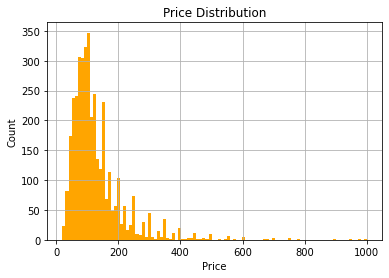

In [19]:
#take a look at the price distribution
new_df['price'].hist(bins=100, color='orange')

plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')


In [20]:
new_df.head()

,id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,...,requires_license_f,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,241032,3.0,3.0,4,1.0,1.0,1.0,2,1,365,...,1,1,0,0,1,0,1,0,1,0
1,953595,6.0,6.0,4,1.0,1.0,1.0,1,2,90,...,1,1,0,0,0,1,0,1,0,1
2,3308979,2.0,2.0,11,4.5,5.0,7.0,10,4,30,...,1,1,0,0,0,1,1,0,1,0
3,7421966,1.0,1.0,3,1.0,0.0,2.0,1,1,1125,...,1,1,0,1,0,0,1,0,1,0
4,278830,2.0,2.0,6,2.0,3.0,3.0,6,1,1125,...,1,1,0,0,0,1,1,0,1,0


# 4. Modeling 

In [35]:
X = new_df.drop(columns=['price','id'])
y = new_df['price']
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)


# Scaling of test and training data
#scaler=StandardScaler()
#X_train_scale=scaler.fit_transform(X)


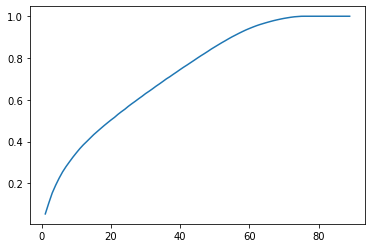

In [36]:
from sklearn.decomposition import PCA
explained_var = list()
for i in range(1,90):
    pca = PCA(n_components=i)
    pca.fit(rescaledX)
    explained_var.append(pca.explained_variance_ratio_.sum())
x = np.arange(1, 90)
expained_var = np.array(explained_var)
plt.plot(x,explained_var)

In [49]:
pca = PCA(n_components=50) 
pca.fit(rescaledX)
pcadata = pca.fit_transform(rescaledX)
pca.explained_variance_ratio_.sum()

0.8533250456269263

In [50]:
X_train, X_test, y_train, y_test = train_test_split(pcadata, y, test_size=0.3, random_state=42)
lnmodel = LinearRegression(normalize=True)
lnmodel.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [51]:
# Model function for training
import matplotlib.patches as mpatches

def train_predict(data, component_low, component_high, model): 
    '''
    inputs:
       - model: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    mse_train = list()
    mse_test = list()
    r2_train = list()
    r2_test = list()
    for i in range(component_low,component_high):
        pca = PCA(n_components=i) 
        pca.fit(data)
        pcadata = pca.fit_transform(data)
        X_train, X_test, y_train, y_test = train_test_split(pcadata, y, test_size=0.25, random_state=42)
        model.fit(X_train,y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)
        mse_train.append(mean_squared_error(y_train, y_train_pred))
        mse_test.append(mean_squared_error(y_test, y_test_pred))
        r2_train.append(r2_score(y_train, y_train_pred))
        r2_test.append(r2_score(y_test, y_test_pred))
        
    x = range(component_low,component_high)
    
    plt.plot(x,mse_train,color='black')
    plt.plot(x,mse_test,color='blue')
    mse_train_patch = mpatches.Patch(color='black', label='mse_train')
    mse_test_patch = mpatches.Patch(color='blue', label='mse_test')
    plt.legend(handles=[mse_test_patch, mse_train_patch])
    plt.show()
    #Predict and score the model
    print("The r-squared score for your model on the training data was {} on {} values. The RMSE was {}".format(r2_train[-1], len(y_train), mse_train[-1]))
    print("The r-squared score for your model on the test data was {} on {} values.  The RMSE was {}".format(r2_test[-1], len(y_test),mse_test[-1]))



# 5. Results and Evaluation

## 5.1 R2 Score and RMSE

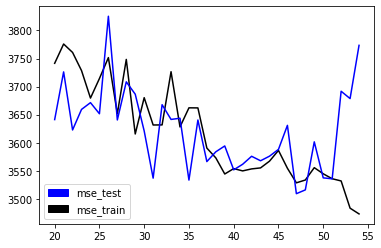

The r-squared score for your model on the training data was 0.5697461578938892 on 2863 values. The RMSE was 3473.075196123444
The r-squared score for your model on the test data was 0.5482844152986355 on 955 values.  The RMSE was 3773.5084844772123


In [52]:
lnmodel = LinearRegression(normalize=True)
train_predict(rescaledX,20,55,lnmodel)


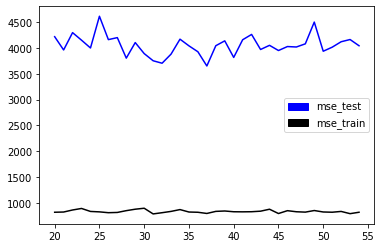

The r-squared score for your model on the training data was 0.8991090295845305 on 2863 values. The RMSE was 814.4074324765096
The r-squared score for your model on the test data was 0.5158010726398119 on 955 values.  The RMSE was 4044.8654473065735


In [53]:
# It seems that random forest would greatly overfit the data in this case
forest = RandomForestRegressor(max_depth=40, random_state=0, n_estimators=10, criterion='mse')
train_predict(rescaledX,20,55,forest)

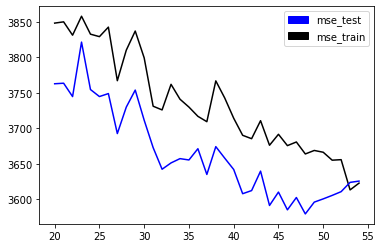

The r-squared score for your model on the training data was 0.5511794302325614 on 2863 values. The RMSE was 3622.94867778275
The r-squared score for your model on the test data was 0.5659680181604546 on 955 values.  The RMSE was 3625.7845013002416


In [54]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
train_predict(rescaledX,20,55,regr)

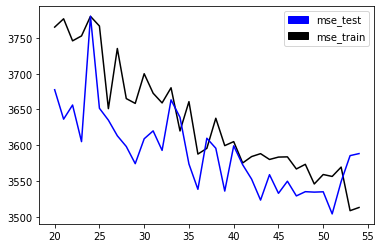

The r-squared score for your model on the training data was 0.5647854233534888 on 2863 values. The RMSE was 3513.1190084052373
The r-squared score for your model on the test data was 0.5704424893809426 on 955 values.  The RMSE was 3588.4059921544417


In [55]:
lassomodel = linear_model.Lasso(alpha=0.8)
train_predict(rescaledX,20,55,lassomodel)

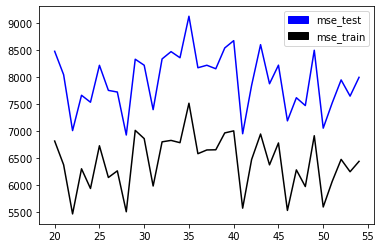

The r-squared score for your model on the training data was 0.20267477893476815 on 2863 values. The RMSE was 6436.1318308515065
The r-squared score for your model on the test data was 0.04329091451067879 on 955 values.  The RMSE was 7992.086112453058


In [56]:
adamodel= AdaBoostRegressor(random_state=0, n_estimators=300)
train_predict(rescaledX,20,55,adamodel)

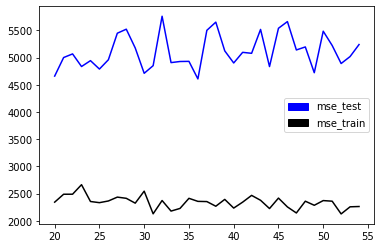

The r-squared score for your model on the training data was 0.7198185905693892 on 2863 values. The RMSE was 2261.6674350774865
The r-squared score for your model on the test data was 0.37276453362462236 on 955 values.  The RMSE was 5239.753584542108


In [57]:
dectreemodel = DecisionTreeRegressor(max_depth=9, min_samples_split=15, min_samples_leaf=8)
train_predict(rescaledX,20,55,dectreemodel)

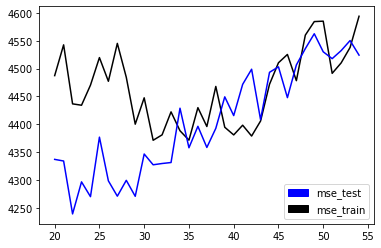

The r-squared score for your model on the training data was 0.4308897893253498 on 2863 values. The RMSE was 4593.945162417045
The r-squared score for your model on the test data was 0.4584259832222457 on 955 values.  The RMSE was 4524.161256544503


In [58]:
from sklearn import svm
svmmodel = svm.SVC()
train_predict(rescaledX,20,55,svmmodel)

In [59]:
#Final model
pca = PCA(n_components=46) 
pca.fit(rescaledX)
pcadata = pca.fit_transform(rescaledX)
pca.explained_variance_ratio_.sum()
lassomodel = linear_model.Lasso(alpha=0.8)
lassomodel.fit(X_train, y_train)
y_train_pred = lassomodel.predict(X_train)
y_test_pred = lassomodel.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 3542.694, test: 3565.348
R^2 train: 0.555, test: 0.584


The score is not very good but some variance can still be explained.

# Q2: How price and rating relate to each other?

In [61]:
# remove sign
def remove_sign(x,sign):
    if type(x) is str:
        x = float(x.replace(sign,'').replace(',',''))
    return x


In [62]:
df_review = df[["id","price","review_scores_rating","number_of_reviews","weekly_price","monthly_price" ]].dropna()
df_review.price = df_review.price.apply(remove_sign,sign='$')
df_review.head()


,id,price,review_scores_rating,number_of_reviews,weekly_price,monthly_price
1,953595,150.0,96.0,43,"$1,000.00","$3,000.00"
8,4948745,90.0,97.0,8,$500.00,"$1,700.00"
9,2493658,150.0,97.0,32,"$1,000.00","$3,000.00"
11,4454295,99.0,97.0,8,$800.00,"$2,000.00"
12,3883392,245.0,98.0,13,"$1,575.00","$5,800.00"


Text(0, 0.5, 'Review Score Rating')

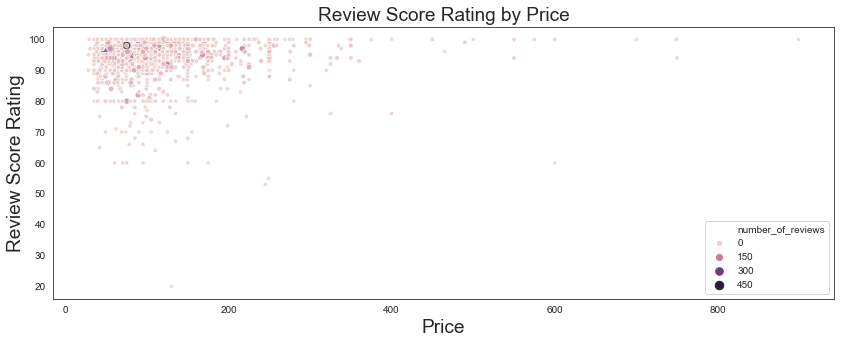

In [68]:
sns.set_style("white")
fig = plt.figure(figsize=(14, 5))
sns.scatterplot(x='price',y='review_scores_rating',hue='number_of_reviews',size ='number_of_reviews', alpha=0.8, data=df_review) 
plt.title('Review Score Rating by Price', fontsize=19)
plt.xlabel('Price', fontsize=19)
plt.ylabel('Review Score Rating', fontsize=19)

    
    

The visualisations shows that low ratings are correlated with lower prices. 
However higher ratings does not indicate higher price. 

In [69]:
df_review.describe()

,id,price,review_scores_rating,number_of_reviews
count,1.263000e+03,1263.000000,1263.000000,1263.000000
mean,4.835393e+06,118.882027,94.229612,25.690420
std,2.830548e+06,80.354304,7.078091,34.273926
min,4.291000e+03,28.000000,20.000000,1.000000
25%,2.298346e+06,70.000000,93.000000,5.000000
50%,5.062445e+06,99.000000,96.000000,14.000000
75%,7.381990e+06,140.000000,99.000000,31.000000
max,9.863484e+06,899.000000,100.000000,404.000000


In [70]:
# find the listing with the highest number of reviews
max_id = df_review[df_review.number_of_reviews == max(df_review.number_of_reviews)]
max_id

,id,price,review_scores_rating,number_of_reviews,weekly_price,monthly_price
3083,25002,75.0,98.0,404,$525.00,"$1,800.00"


In [71]:
# info of this listing
df[df.id== 25002].T

,3083
id,25002
listing_url,https://www.airbnb.com/rooms/25002
scrape_id,20160104002432
last_scraped,2016-01-04
name,"Beautiful, Quiet, Friendly Ballard"
...,...
cancellation_policy,flexible
require_guest_profile_picture,f
require_guest_phone_verification,f
calculated_host_listings_count,1


# Q3: What’s the factor that drives higher prices ?

In [72]:
df = pd.read_csv('listings.csv')
df.price = df.price.apply(remove_sign,sign='$')
df.host_response_rate = df.host_response_rate.apply(remove_sign,sign='%')
df.host_acceptance_rate = df.host_acceptance_rate.apply(remove_sign,sign='%')




In [73]:
df.info()
df = df[df.price.notnull()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

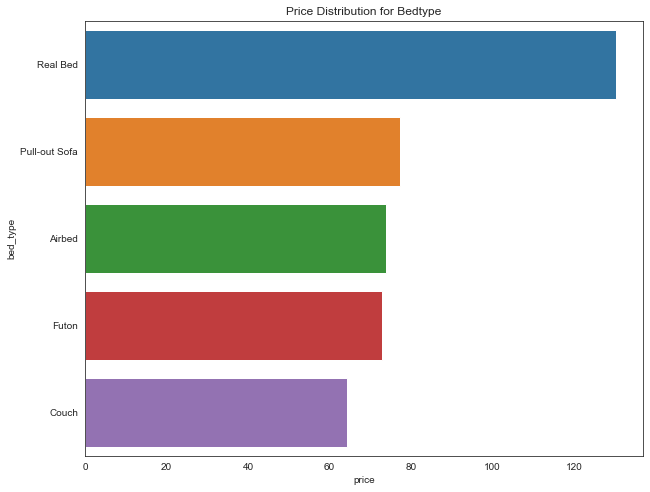

In [74]:
fig = plt.figure(figsize=(10, 8))
df_bed_type = df.groupby('bed_type').mean()[['price']]
df_bed_type.reset_index(inplace=True)
sns.barplot(x='price',y='bed_type',data=df_bed_type.sort_values(by='price', ascending=False))

plt.title('Price Distribution for Bedtype')
df_bed_type.reset_index(inplace=True)




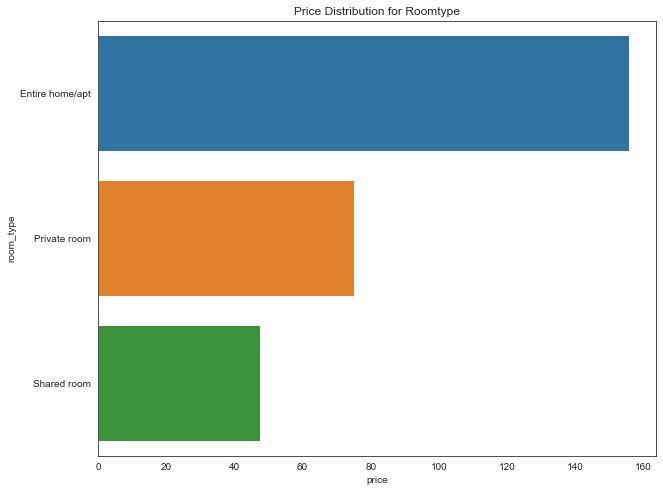

In [75]:
fig = plt.figure(figsize=(10, 8))
# price and bed_type
df_room_type = df.groupby('room_type').mean()[['price']]
df_room_type.reset_index(inplace=True)
sns.barplot(x='price',y='room_type',data=df_room_type.sort_values(by='price', ascending=False))
plt.title('Price Distribution for Roomtype')

df_room_type.reset_index(inplace=True)





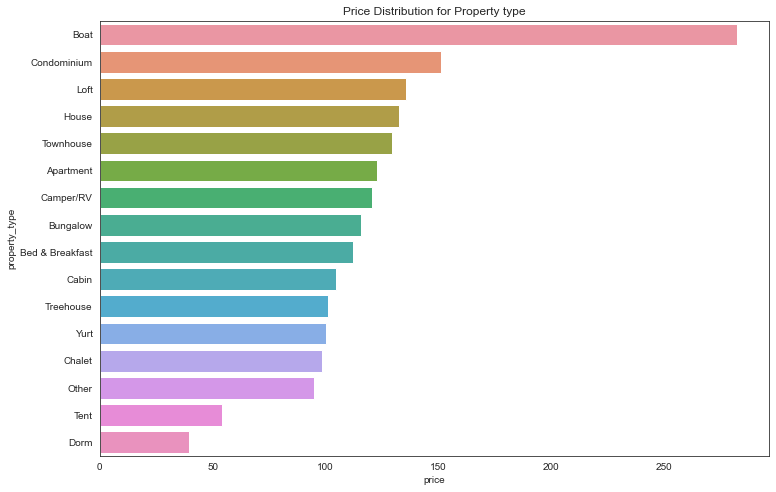

In [76]:
fig = plt.figure(figsize=(12, 8))
df_price = df.groupby('property_type').mean()[['price']]
df_price.reset_index(inplace=True)
sns.barplot(y='property_type',x='price',data=df_price.sort_values(by='price', ascending=False))
plt.title('Price Distribution for Property type')
df_price.reset_index(inplace=True)


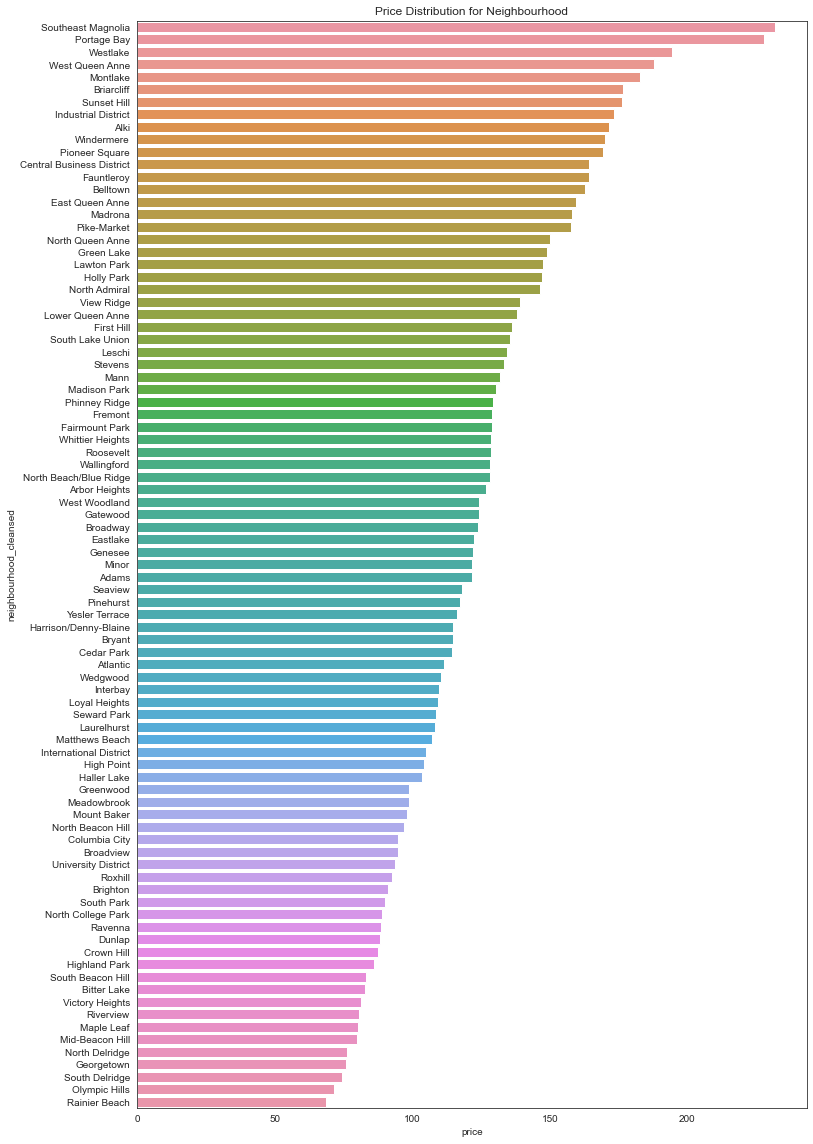

In [77]:
fig = plt.figure(figsize=(12, 20))
df_neighbourhood = df.groupby('neighbourhood_cleansed').mean()[['price']]
df_neighbourhood.reset_index(inplace=True)
sns.barplot(y='neighbourhood_cleansed',x='price',data=df_neighbourhood.sort_values(by='price', ascending=False))
plt.title('Price Distribution for Neighbourhood')
df_neighbourhood.reset_index(inplace=True)





In [78]:
df_amenities=df['amenities'].str.split(',',expand=True)
df_amenities.head(5)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,{TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,Heating,"""Family/Kid Friendly""",Washer,Dryer},...,None,None,None,None,None,None,None,None,None,None
1,{TV,Internet,"""Wireless Internet""",Kitchen,"""Free Parking on Premises""","""Buzzer/Wireless Intercom""",Heating,"""Family/Kid Friendly""",Washer,Dryer,...,None,None,None,None,None,None,None,None,None,None
2,{TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,"""Free Parking on Premises""","""Pets Allowed""","""Pets live on this property""",Dog(s),...,Shampoo},None,None,None,None,None,None,None,None,None
3,{Internet,"""Wireless Internet""",Kitchen,"""Indoor Fireplace""",Heating,"""Family/Kid Friendly""",Washer,Dryer,"""Smoke Detector""","""Carbon Monoxide Detector""",...,None,None,None,None,None,None,None,None,None,None
4,{TV,"""Cable TV""",Internet,"""Wireless Internet""",Kitchen,Heating,"""Family/Kid Friendly""","""Smoke Detector""","""Carbon Monoxide Detector""","""First Aid Kit""",...,None,None,None,None,None,None,None,None,None,None


In [79]:
# Remove special characters from amenities dataframe
df_amenities = df_amenities.replace('[^\w\s]','', regex=True)
df_amenities


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,FamilyKid Friendly,Washer,Dryer,...,None,None,None,None,None,None,None,None,None,None
1,TV,Internet,Wireless Internet,Kitchen,Free Parking on Premises,BuzzerWireless Intercom,Heating,FamilyKid Friendly,Washer,Dryer,...,None,None,None,None,None,None,None,None,None,None
2,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Free Parking on Premises,Pets Allowed,Pets live on this property,Dogs,...,Shampoo,None,None,None,None,None,None,None,None,None
3,Internet,Wireless Internet,Kitchen,Indoor Fireplace,Heating,FamilyKid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,...,None,None,None,None,None,None,None,None,None,None
4,TV,Cable TV,Internet,Wireless Internet,Kitchen,Heating,FamilyKid Friendly,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Wheelchair Accessible,Kitchen,Free Parking on Premises,Heating,FamilyKid Friendly,...,None,None,None,None,None,None,None,None,None,None
3814,TV,Cable TV,Internet,Wireless Internet,Kitchen,Free Parking on Premises,Heating,FamilyKid Friendly,Smoke Detector,Fire Extinguisher,...,None,None,None,None,None,None,None,None,None,None
3815,Cable TV,Wireless Internet,Kitchen,Free Parking on Premises,Breakfast,Pets live on this property,Dogs,Cats,Heating,Washer,...,None,None,None,None,None,None,None,None,None,None
3816,TV,Wireless Internet,Kitchen,Free Parking on Premises,Elevator in Building,Heating,Smoke Detector,Essentials,Hangers,Hair Dryer,...,None,None,None,None,None,None,None,None,None,None


In [80]:

# Add all amenities in dataframe to list
amenities_unique=[df_amenities[x].unique().tolist() for x in df_amenities.columns.values]

# Get unique values of amenities
amenities_unique=set(list(chain.from_iterable(amenities_unique)))
print(amenities_unique)



{'', '24Hour Checkin', 'TV', 'Elevator in Building', 'Smoke Detector', 'Hair Dryer', 'Breakfast', 'Essentials', 'Wireless Internet', 'Gym', 'Cats', 'Suitable for Events', 'Laptop Friendly Workspace', 'Doorman', 'FamilyKid Friendly', 'Lock on Bedroom Door', 'Fire Extinguisher', 'Kitchen', 'Pool', 'Free Parking on Premises', 'Dryer', 'BuzzerWireless Intercom', 'Iron', 'Cable TV', 'Air Conditioning', 'Internet', 'First Aid Kit', 'Pets Allowed', 'Smoking Allowed', 'Heating', 'Washer  Dryer', 'Other pets', 'Carbon Monoxide Detector', 'Dogs', 'Indoor Fireplace', 'Safety Card', 'Washer', 'Wheelchair Accessible', 'Shampoo', None, 'Hot Tub', 'Pets live on this property', 'Hangers'}


In [81]:
# Remove '' and None values
amenities_unique.remove('')
amenities_unique.remove(None)
print('Removed null values:')
print(amenities_unique)

Removed null values:
{'24Hour Checkin', 'TV', 'Elevator in Building', 'Smoke Detector', 'Hair Dryer', 'Breakfast', 'Essentials', 'Wireless Internet', 'Gym', 'Cats', 'Suitable for Events', 'Laptop Friendly Workspace', 'Doorman', 'FamilyKid Friendly', 'Lock on Bedroom Door', 'Fire Extinguisher', 'Kitchen', 'Pool', 'Free Parking on Premises', 'Dryer', 'BuzzerWireless Intercom', 'Iron', 'Cable TV', 'Air Conditioning', 'Internet', 'First Aid Kit', 'Pets Allowed', 'Smoking Allowed', 'Heating', 'Washer  Dryer', 'Other pets', 'Carbon Monoxide Detector', 'Dogs', 'Indoor Fireplace', 'Safety Card', 'Washer', 'Wheelchair Accessible', 'Shampoo', 'Hot Tub', 'Pets live on this property', 'Hangers'}


In [82]:
# Create binary amenity columns
for index in range(30):
    for a in amenities_unique:
        df_amenities[a] = 0

for index in range(30):
    for a in amenities_unique:
        df_amenities[a] += np.where(df_amenities[index] == a, 1, 0)

# Drop redundant column
df_amenities.drop(columns=[x for x in range(30)],inplace=True)


# Append amenities columns to original dataframe
df_with_amenities=df.join(df_amenities,how='left')




In [83]:
# remove sign
def remove_sign(x,sign):
    if type(x) is str:
        x = float(x.replace(sign,'').replace(',',''))
    return x

In [84]:
df_with_amenities.price = df_with_amenities.price.apply(remove_sign,sign='$')
df_with_amenities = df_with_amenities[df_with_amenities.price.notnull()]

df_numeric = df_with_amenities.select_dtypes(include=['int64','float64'])

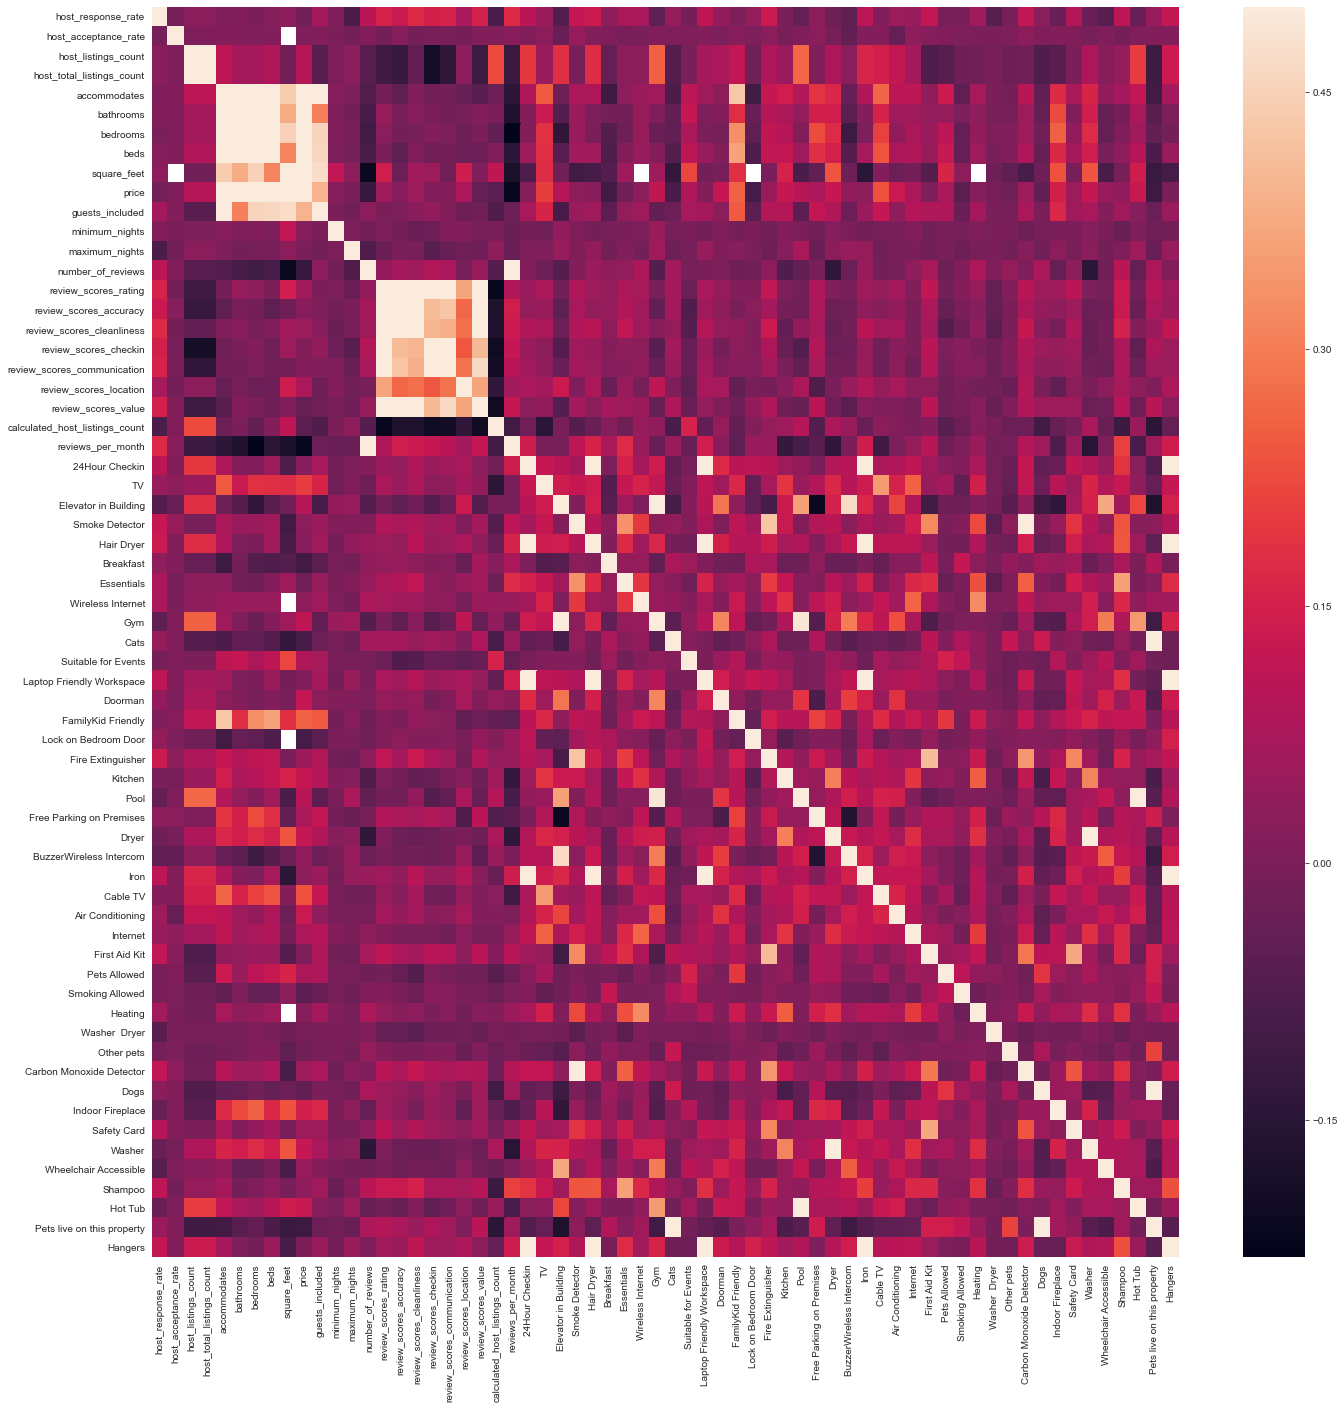

In [85]:
df_numeric = df_numeric.drop(['id','scrape_id','host_id','latitude','longitude',
                              'license', 'availability_30', 'availability_30', 
                             'availability_60', 'availability_90', 'availability_365'], axis=1)

df_corr = df_numeric.corr()
df_corr
mask = np.zeros_like(df_corr, dtype=np.bool)
f, ax = plt.subplots(figsize=(23, 23))
sns.heatmap(df_corr, mask=mask, vmax=.5 )

Accommodates, bathrooms, bedrooms, beds, square_feet, familykid friendly and TV  are the top positive influencing factors.
Pets live on this property, breakfast, number of reviews and reviews per month indicates negative correlations with price. 




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


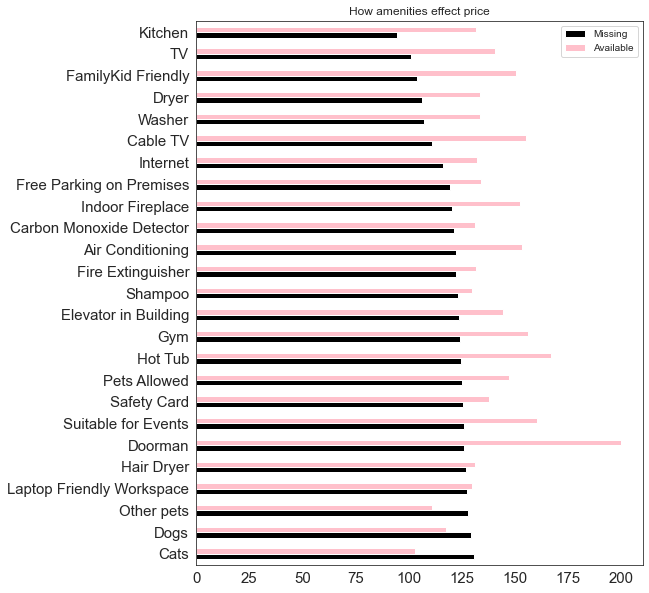

In [90]:

important_features = [
    'FamilyKid Friendly', 
    'Cable TV',
    'Indoor Fireplace',
    'TV',
    'Hot Tub',
    'Doorman',
    'Kitchen',
    'Dogs',
    'Air Conditioning',
    'Dryer',
    'Elevator in Building',
    'Suitable for Events',
    'Pets Allowed',
    'Other pets',
    'Gym',
    'Free Parking on Premises',
    'Laptop Friendly Workspace',
    'Fire Extinguisher',
    'Carbon Monoxide Detector',
    'Safety Card',
    'Shampoo',
    'Hair Dryer',
    'Cats',
    'Internet',
    'Washer'
]
empty_list = []
for feature in important_features:
    empty_list.append(df_numeric.groupby(feature)['price'].mean().rename(feature))

df_amenity = pd.DataFrame(empty_list)
df_amenity.sort_values(by=0, inplace=True, ascending=False)
df_amenity.head(25)



fig, ax = plt.subplots(figsize=(20, 12))
df_amenity.plot.barh(legend=False, title="How amenities effect price", colors =('black','pink'), figsize=(8,10), fontsize=15, sort_columns=False, ax=ax)
ax.legend(["Missing", "Available"]);